In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [2]:
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_val = x_train[-5000:]
x_train = x_train[:-5000]

print("CIFAR-10 shapes:")
print("  x_train:", x_train.shape)
print("  x_val:  ", x_val.shape)
print("  x_test: ", x_test.shape)

# imágenes ruidosas
def add_noise(data, noise_factor=0.1):
    noisy_data = data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
    return np.clip(noisy_data, 0.0, 1.0)

x_train_noisy = add_noise(x_train, noise_factor=0.3)
x_val_noisy = add_noise(x_val, noise_factor=0.3)
x_test_noisy = add_noise(x_test, noise_factor=0.3)

def build_denoising_autoencoder(input_shape=(32, 32, 3)):
    """
    Autoencoder convolucional diseñado para eliminar ruido.
    """
    # Encoder
    inputs = tf.keras.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    
    # Capa latente
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    latent = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(latent)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    outputs = layers.Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same')(x)

    model = tf.keras.Model(inputs, outputs, name="denoising_autoencoder")
    return model

# Entrenamiento
den_autoencoder = build_denoising_autoencoder()
den_autoencoder.compile(optimizer='adam', loss='mse')

EPOCHS = 50
BATCH_SIZE = 128

den_autoencoder.fit(
    x_train_noisy, x_train,
    validation_data=(x_val_noisy, x_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)

num_samples = 5
indices = np.random.choice(range(x_test.shape[0]), num_samples, replace=False)
sample_noisy_images = x_test_noisy[indices]
sample_original_images = x_test[indices]
sample_denoised_images = den_autoencoder.predict(sample_noisy_images)

CIFAR-10 shapes:
  x_train: (45000, 32, 32, 3)
  x_val:   (5000, 32, 32, 3)
  x_test:  (10000, 32, 32, 3)
Epoch 1/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.0275 - val_loss: 0.0126
Epoch 2/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 0.0124 - val_loss: 0.0110
Epoch 3/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0110 - val_loss: 0.0101
Epoch 4/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 0.0100 - val_loss: 0.0095
Epoch 5/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0095 - val_loss: 0.0091
Epoch 6/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0091 - val_loss: 0.0087
Epoch 7/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - loss: 0.0088 - val_loss: 0.0085
Epoch 8/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - loss: 0.0086 - val_loss: 0.0083
Epoch 9/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - loss: 0.0084 - val_loss: 0.0084
Epoch 10/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0082 - val_loss: 0.0081
Epoch 11/50
352/35

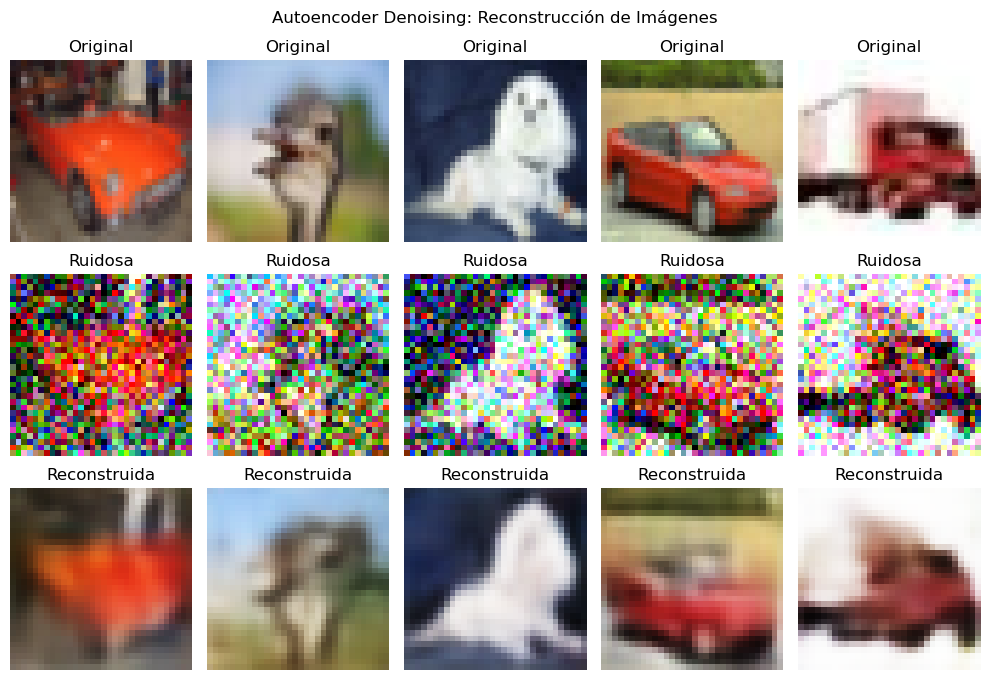

In [ ]:
plt.figure(figsize=(10, 7))

for i in range(num_samples):
    ax = plt.subplot(3, num_samples, i + 1)
    plt.imshow(sample_original_images[i])
    plt.title("Original")
    plt.axis("off")

for i in range(num_samples):
    ax = plt.subplot(3, num_samples, num_samples + i + 1)
    plt.imshow(sample_noisy_images[i])
    plt.title("Ruidosa")
    plt.axis("off")

for i in range(num_samples):
    ax = plt.subplot(3, num_samples, 2 * num_samples + i + 1)
    plt.imshow(sample_denoised_images[i])
    plt.title("Reconstruida")
    plt.axis("off")

plt.suptitle("Autoencoder Denoising: Reconstrucción de Imágenes")
plt.tight_layout()
plt.show()

In [4]:
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_val = x_train[-5000:]
x_train = x_train[:-5000]

print("CIFAR-10 shapes:")
print("  x_train:", x_train.shape)
print("  x_val:  ", x_val.shape)
print("  x_test: ", x_test.shape)

# imágenes ruidosas
def add_noise(data, noise_factor=0.1):
    noisy_data = data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
    return np.clip(noisy_data, 0.0, 1.0)

x_train_noisy = add_noise(x_train, noise_factor=0)
x_val_noisy = add_noise(x_val, noise_factor=0.3)
x_test_noisy = add_noise(x_test, noise_factor=0.3)

def build_denoising_autoencoder(input_shape=(32, 32, 3)):
    """
    Autoencoder convolucional diseñado para eliminar ruido.
    """
    # Encoder
    inputs = tf.keras.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    
    # Capa latente
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    latent = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(latent)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    outputs = layers.Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same')(x)

    model = tf.keras.Model(inputs, outputs, name="denoising_autoencoder")
    return model

# Entrenamiento
den_autoencoder = build_denoising_autoencoder()
den_autoencoder.compile(optimizer='adam', loss='mse')

EPOCHS = 50
BATCH_SIZE = 128

den_autoencoder.fit(
    x_train_noisy, x_train,
    validation_data=(x_val_noisy, x_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)

num_samples = 5
indices = np.random.choice(range(x_test.shape[0]), num_samples, replace=False)
sample_noisy_images = x_test_noisy[indices]
sample_original_images = x_test[indices]
sample_denoised_images = den_autoencoder.predict(sample_noisy_images)

CIFAR-10 shapes:
  x_train: (45000, 32, 32, 3)
  x_val:   (5000, 32, 32, 3)
  x_test:  (10000, 32, 32, 3)
Epoch 1/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 0.0275 - val_loss: 0.0151
Epoch 2/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 0.0102 - val_loss: 0.0146
Epoch 3/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 0.0086 - val_loss: 0.0142
Epoch 4/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 0.0074 - val_loss: 0.0146
Epoch 5/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 0.0067 - val_loss: 0.0131
Epoch 6/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 0.0062 - val_loss: 0.0134
Epoch 7/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 0.0058 - val_loss: 0.0134
Epoch 8/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.0056 - val_loss: 0.0132
Epoch 9/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 0.0053 - val_loss: 0.0136
Epoch 10/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 0.0052 - val_loss: 0.0138
Epoch 11/50
352/352 ━━━

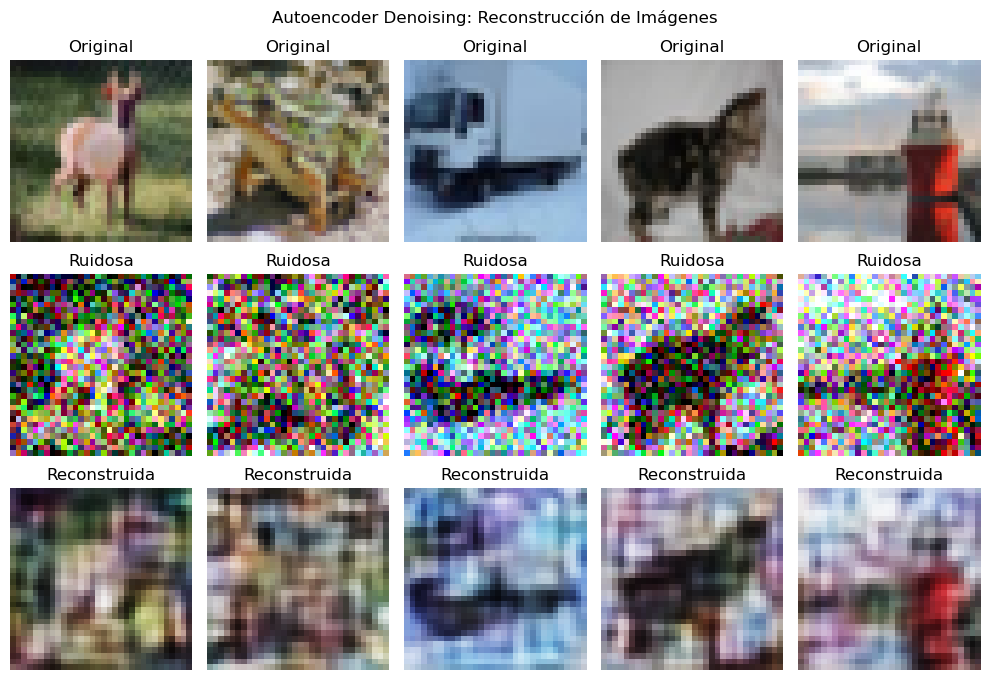

In [5]:
plt.figure(figsize=(10, 7))

for i in range(num_samples):
    ax = plt.subplot(3, num_samples, i + 1)
    plt.imshow(sample_original_images[i])
    plt.title("Original")
    plt.axis("off")

for i in range(num_samples):
    ax = plt.subplot(3, num_samples, num_samples + i + 1)
    plt.imshow(sample_noisy_images[i])
    plt.title("Ruidosa")
    plt.axis("off")

for i in range(num_samples):
    ax = plt.subplot(3, num_samples, 2 * num_samples + i + 1)
    plt.imshow(sample_denoised_images[i])
    plt.title("Reconstruida")
    plt.axis("off")

plt.suptitle("Autoencoder Denoising: Reconstrucción de Imágenes")
plt.tight_layout()
plt.show()